In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [11]:
# load data
df = pd.read_csv('data/jobData.csv.gz')

# clean data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda val: ast.literal_eval(val) if pd.notna(val) else val)
df


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [12]:
# filter data for job in indonesia
df_ID = df[df['job_country']=='Indonesia'].copy()
df_ID

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
643,Data Scientist,Data Scientist,"Bali, Indonesia",via HR Software For Growing Businesses | Fresh...,Full-time,False,Indonesia,2023-07-03 13:14:47,False,False,Indonesia,NaN,NaN,NaN,Tyrads PTE. LTD.,"[python, r, aws, gcp, azure, spark, hadoop, ta...","{'analyst_tools': ['tableau', 'power bi'], 'cl..."
1213,Data Scientist,Data Scientist,Indonesia,via Linkedin,Full-time,False,Indonesia,2023-04-17 13:19:59,False,False,Indonesia,NaN,NaN,NaN,Robert Walters,"[python, sql]","{'programming': ['python', 'sql']}"
1244,Data Engineer,Data Engineer,"Jakarta, Indonesia",via LinkedIn,Full-time,False,Indonesia,2023-08-31 13:44:04,True,False,Indonesia,NaN,NaN,NaN,JULO,"[sql, java, python, postgresql, redshift, aws,...","{'cloud': ['redshift', 'aws', 'gcp', 'azure'],..."
1858,Data Engineer,Data Engineer - ETL Developer,"Jakarta, Indonesia",via LinkedIn,Contractor,False,Indonesia,2023-05-29 13:14:42,False,False,Indonesia,NaN,NaN,NaN,PT. IDStar Cipta Teknologi (IDstar),"[sql, oracle, spark, kafka]","{'cloud': ['oracle'], 'libraries': ['spark', '..."
2048,Senior Data Scientist,Senior Data Scientist,Indonesia,via LinkedIn,Full-time,False,Indonesia,2023-05-25 13:32:17,False,False,Indonesia,NaN,NaN,NaN,Robert Walters,"[sql, python]","{'programming': ['sql', 'python']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785194,Data Analyst,Data Analyst,Indonesia,via Lokersby.id,Full-time,False,Indonesia,2023-07-22 06:46:40,False,False,Indonesia,NaN,NaN,NaN,PT Istana Mobil Surabaya Indah,NaN,NaN
785201,Data Scientist,Data Scientist,"Jakarta, Indonesia",via Trabajo.org,Full-time,False,Indonesia,2023-11-16 06:25:17,False,False,Indonesia,NaN,NaN,NaN,Great Giant Foods (GGF),"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
785271,Data Analyst,Data Analyst,"Jakarta, Indonesia",via Trabajo.org,Full-time,False,Indonesia,2023-11-25 06:23:43,True,False,Indonesia,NaN,NaN,NaN,Everwhite Indonesia,NaN,NaN
785312,Machine Learning Engineer,Machine Learning Engineer,"Jakarta, Indonesia",via Trabajo.org,Full-time,False,Indonesia,2023-11-25 06:23:43,False,False,Indonesia,NaN,NaN,NaN,Aliz,"[python, sql, gcp, bigquery, airflow, pandas, ...","{'cloud': ['gcp', 'bigquery'], 'libraries': ['..."


In [13]:
# find the top 3 most populer data role in indonesia
top_3_data_roles = df_ID.groupby('job_title_short').size().sort_values(ascending=False).head(3).index
top_3_data_roles

Index(['Data Engineer', 'Data Scientist', 'Data Analyst'], dtype='object', name='job_title_short')

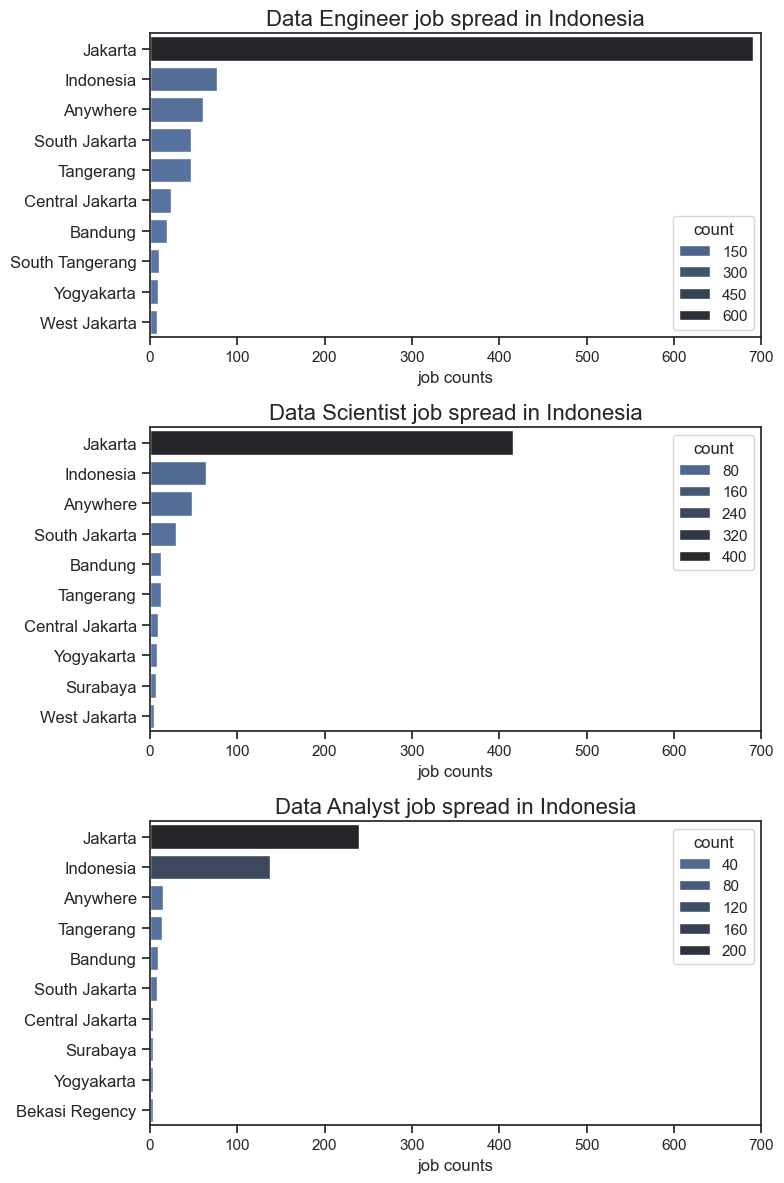

In [14]:
# for top 3 data roles, we can do EDA on the job_location 
fig,ax = plt.subplots(3,1, figsize=(8,12))

sns.set_theme(style='ticks')
for i, item in enumerate(top_3_data_roles):
    df_plot = (df_ID[df_ID['job_title_short'] == item]['job_location'].value_counts().sort_values(ascending=False).head(10).to_frame())
    sns.barplot(data=df_plot, x='count', y='job_location', ax=ax[i], hue='count', palette='dark:b_r')
    ax[i].set_title(f'{item} job spread in Indonesia', fontsize=16)
    # set labels
    current_labels = [tick.get_text() for tick in ax[i].get_yticklabels()]
    new_labels = [','.join(label.split(',')[:1]) for label in current_labels]
    ax[i].set_yticks(ax[i].get_yticks())
    ax[i].set_yticklabels(new_labels, fontsize=12)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('job counts')
    ax[i].set_xlim(0, 700)
    

fig.tight_layout()


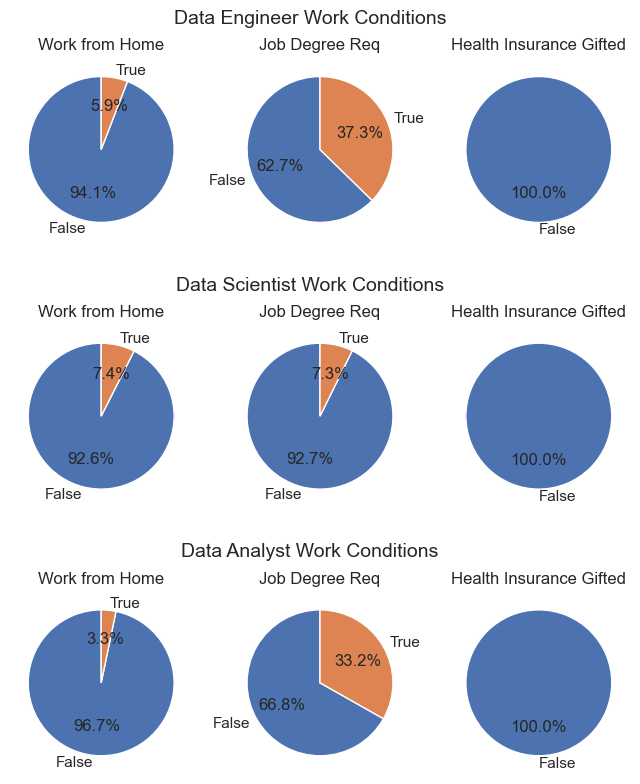

In [15]:
fig = plt.figure(figsize=(8,8))

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Gifted'
}

subfigs = fig.subfigures(3,1)

for i, item in enumerate(subfigs):
    job_title = top_3_data_roles[i]
    df_plot = df_ID[df_ID['job_title_short'] == job_title]
    item.suptitle(f'{job_title} Work Conditions', fontsize=14)
    ax = item.subplots(1,3)
    item.subplots_adjust( top=0.8)
    for j, (column, title) in enumerate(dict_column.items()):
        counts = df_plot[column].value_counts()
        labels = counts.sort_values(ascending=False).head().index
        ax[j].pie(counts, startangle=90, autopct='%.1f%%', labels=labels)
        ax[j].set_title(title, fontsize=12)



# http://stackoverflow.com/questions/55289669/add-margin-to-a-subplot-in-matplotlib

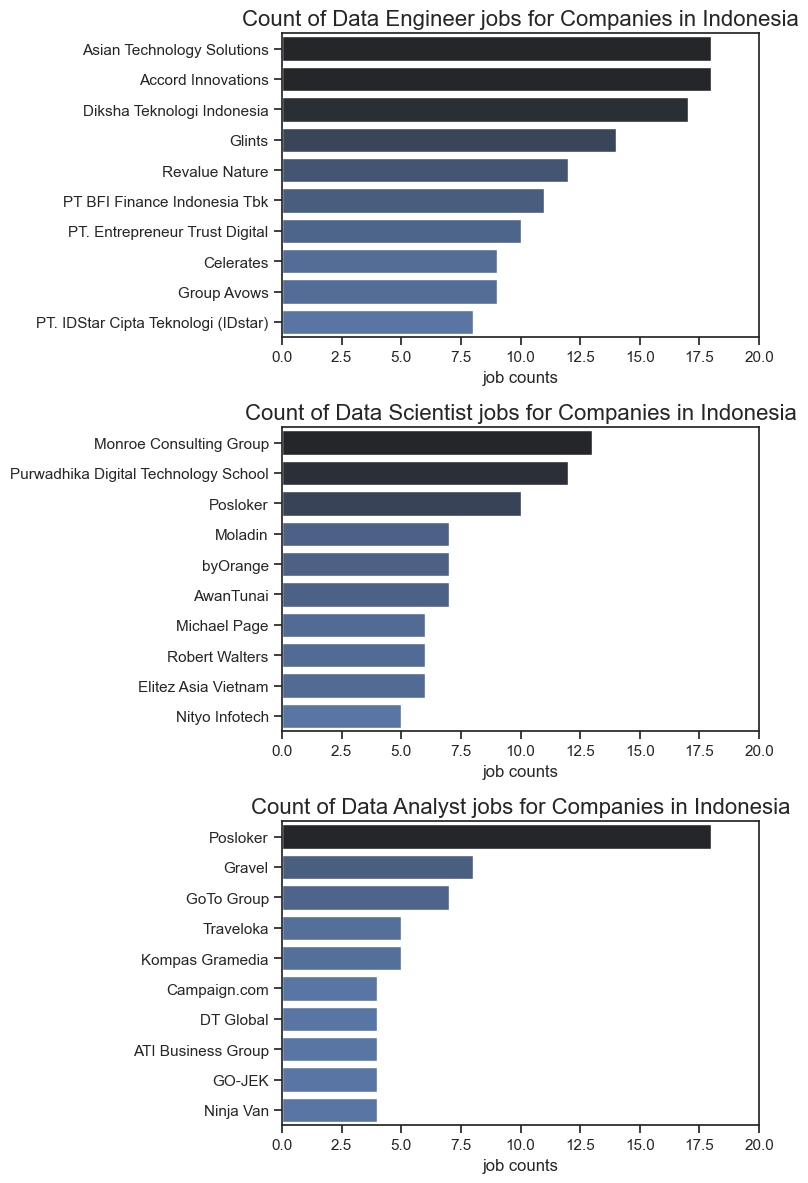

In [16]:
# for top 3 data roles, we can do EDA on the job_location 
fig,ax = plt.subplots(3,1, figsize=(8,12))

sns.set_theme(style='ticks')
for i, item in enumerate(top_3_data_roles):
    df_plot = (df_ID[df_ID['job_title_short'] == item]['company_name'].value_counts().sort_values(ascending=False).head(10).to_frame())
    sns.barplot(data=df_plot, x='count', y='company_name', ax=ax[i], hue='count', palette='dark:b_r')
    ax[i].set_title(f'Count of {item} jobs for Companies in Indonesia', fontsize=16)
    # set labels
    # current_labels = [tick.get_text() for tick in ax[i].get_yticklabels()]
    # new_labels = [','.join(label.split(',')[:1]) for label in current_labels]
    # ax[i].set_yticklabels(new_labels, fontsize=12)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('job counts')
    ax[i].set_xlim(0, 20)
    ax[i].legend().set_visible(False)
    


fig.tight_layout()
